In [60]:
import os 
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("../scripts"))
import data_loader

Loading the Dataset

In [8]:
file_path=("../Data/raw_analyst_ratings.csv")
dataframe=data_loader.load_dataset(file_path)

Dataset loaded successfully!


Perfoming EDA

1. Displaying the first 5 instances of the dataset

In [9]:
dataframe.head()

,ID,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


2. Displaying the last 5 instances of the dataset

In [10]:
dataframe.tail()

,ID,headline,url,publisher,date,stock
1048570,1053768,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013 0:00,QLGC
1048571,1053769,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013 0:00,QLGC
1048572,1053770,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013 0:00,QLGC
1048573,1053771,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013 0:00,QLGC
1048574,1053772,QLogic Reports New $125M Revolving Credit Line,https://www.benzinga.com/news/13/03/3438962/ql...,Paul Quintaro,3/22/2013 0:00,QLGC


3. Checking the number of rows/instances and columns/feature of the dataset

In [11]:
dataframe.shape

(1048575, 6)

Descriptive Statistics

In [14]:
dataframe.describe()

,ID
count,1.048575e+06
mean,5.270714e+05
std,3.041128e+05
min,0.000000e+00
25%,2.637275e+05
50%,5.270880e+05
75%,7.903815e+05
max,1.053772e+06


Data Cleaning

1. Checking of duplicate values 

In [15]:
dataframe.isnull().sum()

ID           0
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [35]:
no_article=dataframe["publisher"].value_counts()
print(no_article)

publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
                      ...  
Joseph Trevisani          1
CannabisFN                1
janaviktoria              1
pagetraffic               1
GeoInvesting              1
Name: count, Length: 984, dtype: int64


In [101]:
filtered_df = dataframe[dataframe['publisher'].isin(no_article[no_article ==1].index)]


In [58]:
average=dataframe["publisher"].value_counts()

maximum=average.max()
minimum=average.min()
medium=average.mean()
print("Maximum number of publication=", maximum)
print("Medium number of publication=", medium)
print("Minimum number of publication=", minimum)

Maximum number of publication= 168435
Medium number of publication= 1065.625
Minimum number of publication= 1


2. Normalization (Standardizing the date values)

In [19]:
dataframe['date'] = pd.to_datetime(dataframe['date'], errors='coerce')

In [27]:
dataframe[dataframe["date"].isna()]
df = dataframe.dropna(subset=['date'])

In [31]:
cleaned_date=df

cleaned_date.to_csv("cleaned_dataset.csv", index=False)

Article per publisher

In [33]:
articles_per_publisher = df['publisher'].value_counts()
print(articles_per_publisher)

publisher
Benzinga Newsdesk    11174
Lisa Levin            9412
ETF Professor         3184
Paul Quintaro         3035
Benzinga Newsdesk     2298
                     ...  
Tim Melvin               1
Ritesh Anan              1
Sam Liu                  1
Ken Shreve               1
Aaron Jackson.Ed         1
Name: count, Length: 203, dtype: int64


Visualization of number of article published per publisher

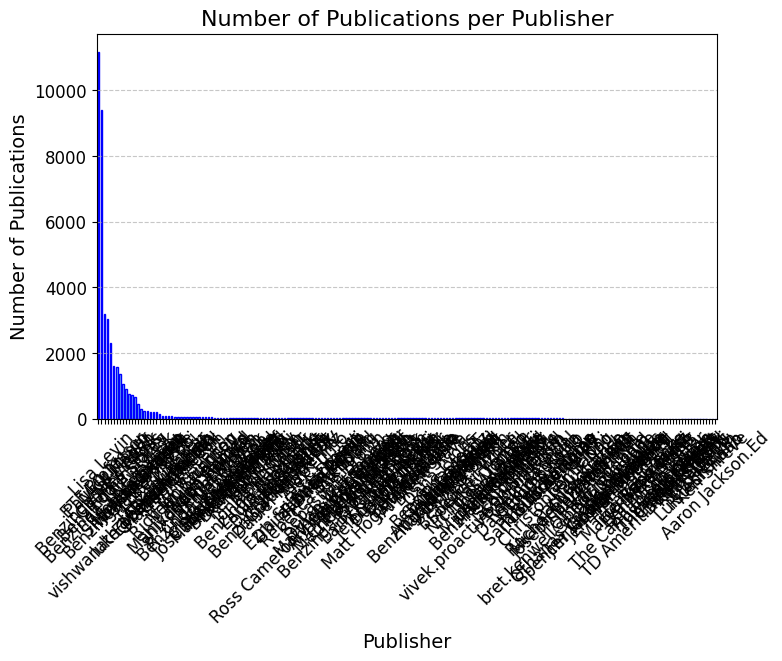

In [62]:
plt.figure(figsize=(8, 5))
articles_per_publisher.plot(kind='bar', color='skyblue', edgecolor='blue')
plt.title('Number of Publications per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

from the above diagram,we can conclude that most of the publisher have less than 2000 articles. Only few publishers (around 5 publishers) have publication morethan 2000 articles 

List out the number of publisher with exactly one articles published

In [66]:
num_single_article_publishers = (articles_per_publisher== 1).sum()
print(num_single_article_publishers)

50


There are 50 publishers exactily published only one article

○	Text Analysis(Sentiment analysis & Topic Modeling):

In [ ]:
import textblob 
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
dataframe['polarity'] = dataframe['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

○	Time Series Analysis:

○	Publisher Analysis:

Task 2:

Quantitative analysis using pynance and TaLib

In [103]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px
import talib as tl

In [104]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>